## Importing The Necessary Libraries:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.ticker import FuncFormatter

import warnings
warnings.filterwarnings('ignore')

df_original = pd.read_csv(r'C:\Users\Mohamed Fawzi\Desktop\Data Analysis Projects\EVs Market Analysis\EVs_Market.csv')

df = df_original.copy()

df.head(2)

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJYGDEE1L,King,Seattle,WA,98122.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,37.0,125701579,POINT (-122.30839 47.610365),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,7SAYGDEE9P,Snohomish,Bothell,WA,98021.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,1.0,244285107,POINT (-122.179458 47.802589),PUGET SOUND ENERGY INC,5.306105e+10


## Data Cleaning:

##### - Handling missing values

In [2]:
# check if there are missing values in the dataset
df.isnull().sum()

VIN (1-10)                                             0
County                                                 5
City                                                   5
State                                                  0
Postal Code                                            5
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 389
DOL Vehicle ID                                         0
Vehicle Location                                       9
Electric Utility                                       5
2020 Census Tract                                      5
dtype: int64

In [3]:
# dropping missing values from the dataset
df = df.dropna()

## Exploratory Data Analysis (EDA):
- #### **Points To Explore:**
     -   **2 -** Geographical Distribution of EVs:
          -    Which counties have the highest number of EV registrations? 
          -    How is the distribution of EVs within the cities of these top counties?

In [4]:
df.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

In [20]:
df_county = df.copy()

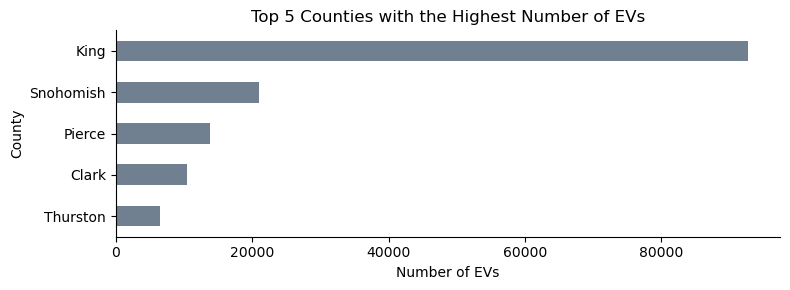

In [101]:
plt.figure(figsize=(8,3))
# filtering the dataset to get the top 5 counties
top_5_counties = df_county['County'].value_counts().head(5).plot(kind='barh', color='slategrey')

plt.gca().invert_yaxis()

sns.despine()
plt.title('Top 5 Counties with the Highest Number of EVs')
plt.xlabel('Number of EVs')
plt.ylabel('County')

plt.tight_layout()
plt.show()


-   #### Insights:
    -   **King County** leads in EV adoption, showing strong infrastructure and incentives.

    -   Numbers gradually decrease from *King* to *Thurston* County, indicating urban areas have higher EV adoption.

    -   **Snohomish & Pierce** Counties also show significant numbers, likely benefiting from proximity to *King* County.

    -   **Clark & Thurston** Counties have the lowest among the top five, possibly due to rural settings.


- Now let's analyze the distribution of EVs with in the cities in the top 5 counties:

In [74]:
top_5_counties_list = df_county['County'].value_counts().head(5)

In [75]:
# creating a new dataframe for only the top 5 counties
df_city = df_county[df_county['County'].isin(top_5_counties_list.index)]

#df_city.head(2)

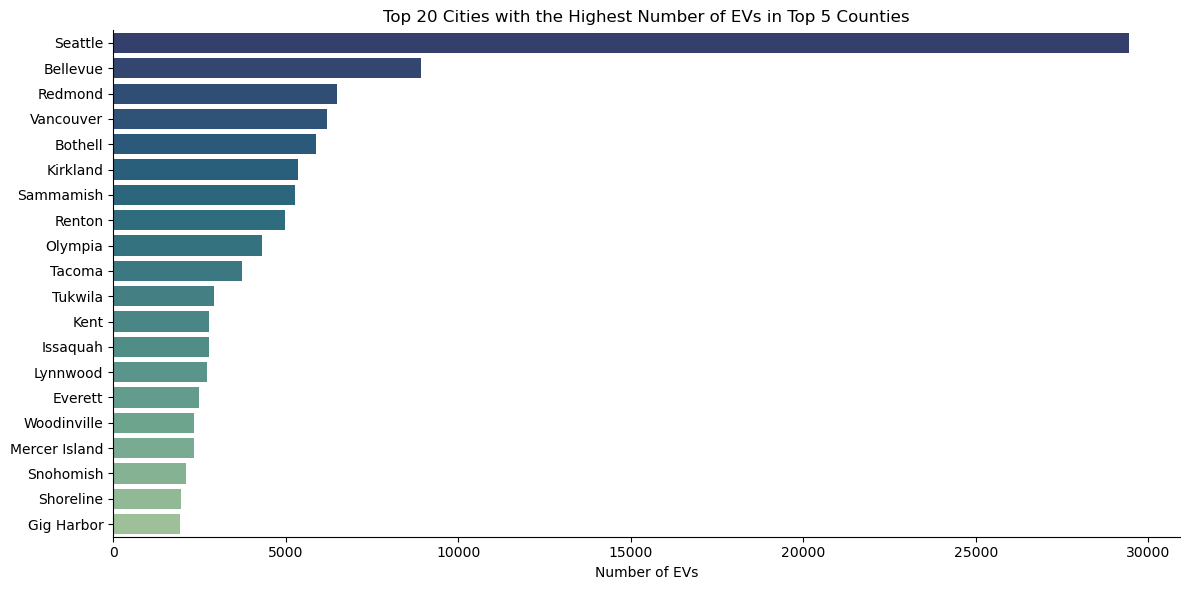

In [77]:
plt.figure(figsize=(12, 6))
# plotting the top 20 cities with the highest number of EVs
df_plot = df_city['City'].value_counts().head(20)

sns.barplot(x=df_plot.values, y=df_plot.index, palette='crest_r')

sns.despine()

plt.title('Top 20 Cities with the Highest Number of EVs in Top 5 Counties')
plt.xlabel('Number of EVs')
plt.ylabel('')

plt.tight_layout()
plt.show()

-   #### Insights:
    -   **Seattle** leads by a significant margin, indicating it has the highest number of EVs.

    -   **Bellevue and Redmond** follow, showing strong EV adoption likely due to tech influence and infrastructure.

    -   **Vancouver and Bothell** also have a substantial number of EVs, *suggesting these cities have embraced EVs.*

    -   **Shoreline and Gig Harbor** have the fewest EVs among the *top 20*, indicating lower adoption rates in these areas.
